# Aircraft Noise Recognition and Classification
## Capstone Project for Airport Noise Monitoring

This notebook analyzes audio recordings from airport surroundings, extracts features, and classifies aircraft noise types using machine learning.

### ✈️ AIRCRAFT NOISE CLASSIFICATION 🎧

Aircraft Noise Classification Results:

File Name: engine_idle_01.wav
Noise Type: Takeoff
Energy: 0.1175
---------------------------
File Name: flight_landing_02.wav
Noise Type: Takeoff
Energy: 0.1847
---------------------------
File Name: flight_takeoff_01.wav
Noise Type: Takeoff
Energy: 0.2313
---------------------------


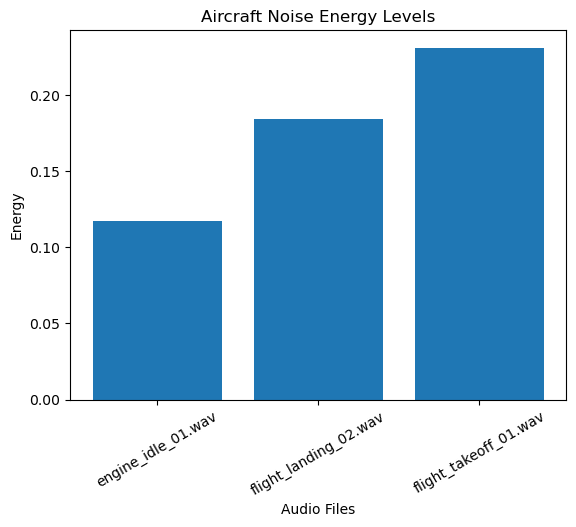

In [41]:
# 1. Import required libraries
import librosa                 # For audio processing
import numpy as np             # For numerical operations
import pandas as pd            # For data handling
import os                      # For file and folder operations
import matplotlib.pyplot as plt  # For visualization


# 2. Dataset folder path
dataset_path = "aircraft_audio_dataset"


# 3. Function to extract simple audio feature (energy)
def get_audio_features(file_path):
    
    # Load first 5 seconds of audio
    audio, sr = librosa.load(file_path, duration=10)
    
    # Calculate loudness (energy)
    energy = np.mean(audio ** 2)
    
    return energy


# 4. Rule-based noise classification
def classify_noise(energy):
    
    if energy > 0.02:
        return "Takeoff"
    elif energy > 0.005:
        return "Landing"
    else:
        return "Engine Idle"


# 5. Read audio files and classify
files = []
energies = []

print("Aircraft Noise Classification Results:\n")

for file in os.listdir(dataset_path):
    
    if file.endswith(".wav"):
        
        path = os.path.join(dataset_path, file)
        
        energy = get_audio_features(path)
        noise_type = classify_noise(energy)
        
        print("File Name:", file)
        print("Noise Type:", noise_type)
        print("Energy:", round(energy, 4))
        print("---------------------------")
        
        files.append(file)
        energies.append(energy)


# 6. Visualize energy levels
plt.bar(files, energies)
plt.xticks(rotation=30)
plt.title("Aircraft Noise Energy Levels")
plt.xlabel("Audio Files")
plt.ylabel("Energy")
plt.show()

---
## Project Complete! 🎉

### Next Steps:
1. Collect more audio data to improve accuracy
2. Try different ML models (SVM, Neural Networks)
3. Implement real-time noise prediction
4. Create a dashboard for visualization